# 数据的编码方法

在实际的数据分析与处理工作中，我们常常需要对数据做一些预处理。本节内容主要讲述如何对数据进行编码。

在[蘑菇分类实践](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/杭电机器学习课程及代码/2.07%20蘑菇分类实践.ipynb)一节中，我们简单地涉及到了 `LabelEncoding` 的内容，就是将离散的字符型等级变量，如A, B, C, D 等，通过数字编码的方式，变成机器可以识别的数字内容。

像 `LabelEncoding` 等对原始数据特征进行一定地组合变换的方法，属于对特征的编码（encoding）方法，这些编码方法由属于**特征工程**的一部分。而众所周知的，特征工程是机器学习工作中最重要环节之一。

## 参考数据

本节数据出自[Categorical Feature Encoding Challenge](https://www.kaggle.com/c/cat-in-the-dat/discussion/105537)，这是由 Kaggle 提供的专门用于数据特征编码的数据集。

代码参考了该比赛中各路网友分享的[notebooks](https://www.kaggle.com/c/cat-in-the-dat/notebooks)：

- [An Overview of Encoding Techniques](https://www.kaggle.com/shahules/an-overview-of-encoding-techniques)
- [Encoding Cyclical Features for Deep Learning](https://www.kaggle.com/avanwyk/encoding-cyclical-features-for-deep-learning)

### 数据说明

待补充

## 读取数据

有需要的话建议自行在官网参赛[下载](https://www.kaggle.com/c/cat-in-the-dat/data)。

>百度网盘：
>
>链接：https://pan.baidu.com/s/1l1Ns4UWAYbh6mO4kgDN5Rg 
>
>提取码：cq3v 
>
>如果失效请在Github提issue，或者从官网下载。

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import base

In [2]:
# 显示所有的列
pd.set_option('display.max_columns', None)

In [3]:
df_train = pd.read_csv('../datasets/Categorical Feature Encoding Challenge/train.csv')
df_test = pd.read_csv('../datasets/Categorical Feature Encoding Challenge/test.csv')
sample_submission = pd.read_csv('../datasets/Categorical Feature Encoding Challenge/sample_submission.csv')

### 观察数据

这里我们会简要预览一下数据的格式，具体的部分数据分析方法在 [2.04 特征的统计学检查](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/%E6%9D%AD%E7%94%B5%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E8%AF%BE%E7%A8%8B%E5%8F%8A%E4%BB%A3%E7%A0%81/2.04%20%E7%89%B9%E5%BE%81%E7%9A%84%E7%BB%9F%E8%AE%A1%E5%AD%A6%E6%A3%80%E6%9F%A5.ipynb) 和 [2.07 蘑菇分类实践](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/%E6%9D%AD%E7%94%B5%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E8%AF%BE%E7%A8%8B%E5%8F%8A%E4%BB%A3%E7%A0%81/2.07%20%E8%98%91%E8%8F%87%E5%88%86%E7%B1%BB%E5%AE%9E%E8%B7%B5.ipynb) 中已经有简单实践了。

In [4]:
df_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [5]:
df_test.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,Piano,0870b0a5d,9ceb19dd6,530f8ecc3,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
1,300001,0,0,0,T,N,Red,Square,Lion,Canada,Piano,a5c276589,1ad744242,12e6161c9,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
2,300002,1,0,1,F,Y,Blue,Square,Dog,China,Piano,568550f04,1fe17a1fd,27d6df03f,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
3,300003,0,0,1,T,Y,Red,Star,Cat,China,Piano,c5725677e,a6542cec0,30c63bd0c,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
4,300004,0,1,1,F,N,Red,Trapezoid,Dog,China,Piano,e70a6270d,97b6a3518,a42386065,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11


In [6]:
sample_submission.head()

,id,target
0,300000,0.5
1,300001,0.5
2,300002,0.5
3,300003,0.5
4,300004,0.5


### 数据类型分析

#### 匿名数据

匿名数据一般指的是给出了数据内容，但是并没有指明这些数据的所在范围或者实际含义的数据。

本题中的数据就是匿名数据的一种表现形式，数据集给出了每个id对应的特征，但是并未说明这些特征的实际特征名称，而是简单地用 `bin` 或者 `nom` 等形式替代。

#### 反向猜测

有的时候匿名数据的特征名称是可以从很多实例的特征取值中反向猜测的。

以这份数据集为例子，我们可以依次分析一下每一列数据的特征。

#### 实践 - bin类特征

首先从 `bin` 类特征开始。 `bin` 一般是 `binary` 的缩写，意思是二进制，换句话说就是这些特征是**二分类**的，如“Yes”或者“No”，又如“True”或者“False”等。

In [7]:
# 筛选'bin'特征
bin_list = []

for column in df_train.columns:
    if 'bin' in column:
        bin_list.append(column)
        
df_train_bin = df_train[bin_list]

In [8]:
df_train_bin.head(10)

,bin_0,bin_1,bin_2,bin_3,bin_4
0,0,0,0,T,Y
1,0,1,0,T,Y
2,0,0,0,F,Y
3,0,1,0,F,Y
4,0,0,0,F,N
5,0,1,1,T,N
6,0,1,1,T,N
7,1,0,1,T,Y
8,1,0,1,T,Y
9,0,0,0,F,Y


以刚刚筛选出来的5个 binary 特征为例，单从数据上来看似乎无法逆推出每个数据的实际含义。也许还可以继续分析数据分布，然后与后面的其他特征联合分析，这里暂时跳过。

#### 实践-nom类特征

`nom` 指的是 `nominal` 特征，就是名词类特征，或者叫**分类特征**。这类特征没有数字大小重要性的区别，比如职业/人名等。

In [9]:
# 筛选'nom'特征
nom_list = []

for column in df_train.columns:
    if 'nom' in column:
        nom_list.append(column)
        
df_train_nom = df_train[nom_list]

In [10]:
df_train_nom.head()

,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9
0,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51
1,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21
2,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0
3,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71
4,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7


In [11]:
list(set(df_train_nom['nom_0'].values))

['Blue', 'Red', 'Green']

In [12]:
list(set(df_train_nom['nom_1'].values))

['Square', 'Star', 'Trapezoid', 'Circle', 'Polygon', 'Triangle']

In [13]:
list(set(df_train_nom['nom_2'].values))

['Lion', 'Cat', 'Snake', 'Dog', 'Axolotl', 'Hamster']

In [14]:
list(set(df_train_nom['nom_3'].values))

['China', 'Canada', 'Finland', 'India', 'Costa Rica', 'Russia']

In [15]:
list(set(df_train_nom['nom_4'].values))

['Oboe', 'Theremin', 'Bassoon', 'Piano']

In [16]:
len(list(set(df_train_nom['nom_5'].values)))

222

In [17]:
len(list(set(df_train_nom['nom_6'].values)))

522

In [18]:
len(list(set(df_train_nom['nom_7'].values)))

1220

In [19]:
len(list(set(df_train_nom['nom_8'].values)))

2215

In [20]:
len(list(set(df_train_nom['nom_9'].values)))

11981

从上述特征可以大致看出：

- nom_0：三种颜色。
- nom_1：某些常见形状。
- nom_2：可能是一些宠物？但是养狮子的毕竟不多。
- nom_3：国籍？或者所在地？
- nom_4：可能是乐器？
- nom_5：无法猜测。
- nom_6：无法猜测。
- nom_7：无法猜测。
- nom_8：无法猜测。
- nom_9：无法猜测。

在后几种特征中，特征涵义无法被探知，因为被“加密”了。这类特征也可以叫做**加密特征**。

当然我们还没有分析这些特征的分布，如果分析了相关分布也许对我们的反向猜测有所帮助。

>比如我们可以合理猜测，后几种加密的特征可能是 id 所在的省/州，县/市/区，以及村/镇/街道等。因为数量是逐级递增的，而且这些属于个人隐私，被加密也是合情合理的。

#### 实践-ord类特征

`ord` 指 `ordinal` 特征，即序数类特征，类似于等级变量，它有大小之分，有顺序关联，比如用户给电影的打分。

In [21]:
# 筛选'bin'特征
ord_list = []

for column in df_train.columns:
    if 'ord' in column:
        ord_list.append(column)
        
df_train_ord = df_train[ord_list]

In [22]:
df_train_ord.head()

,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
0,2,Grandmaster,Cold,h,D,kr
1,1,Grandmaster,Hot,a,A,bF
2,1,Expert,Lava Hot,h,R,Jc
3,1,Grandmaster,Boiling Hot,i,D,kW
4,1,Grandmaster,Freezing,a,R,qP


In [23]:
list(set(df_train_ord['ord_0'].values))

[1, 2, 3]

In [24]:
list(set(df_train_ord['ord_1'].values))

['Grandmaster', 'Master', 'Expert', 'Contributor', 'Novice']

In [25]:
list(set(df_train_ord['ord_2'].values))

['Warm', 'Freezing', 'Hot', 'Boiling Hot', 'Lava Hot', 'Cold']

In [26]:
list(set(df_train_ord['ord_3'].values))

['e', 'c', 'a', 'k', 'o', 'm', 'h', 'n', 'd', 'b', 'i', 'f', 'g', 'j', 'l']

In [27]:
len(list(set(df_train_ord['ord_4'].values)))

26

In [28]:
len(list(set(df_train_ord['ord_5'].values)))

192

从上述特征可以大致看出：

- ord_0：三种类别。
- ord_1：Kaggle 等级
- ord_2：可能是某些气候？或者当地温度？
- ord_3：难以猜测。
- ord_4：难以猜测。
- ord_5：难以猜测。

------------

#### 时间序列类数据

最后的 `day` 和  `month` 就是日期数据，我们可以据此查找时间变化趋势。

#### target

最后我们分析一下目标：

In [29]:
set(df_train['target'].values)

{0, 1}

故这是一个二分类任务数据集。

## Label Encoding

在 **Label Encoding** 中，我们简单地将每个分类地数据都替换为一个数字（通常是正整数）。

例如我们把“猫”设定为 1 ，把“狗”设定为 2， 把“仓鼠”设定为 3 等等。

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
X = df_train.drop(['target'], axis=1)
y = df_train['target']

In [32]:
df_train_LE = pd.DataFrame()
label = LabelEncoder()

# 如果是Object特征就进行编码
for c in X.columns:
    if (X[c].dtype == 'object'):
        df_train_LE[c]=label.fit_transform(X[c])
    else:
        df_train_LE[c]=X[c]

In [33]:
df_train_LE.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,0,1,1,1,5,5,3,0,78,120,491,1686,2175,2,2,1,7,3,136,2,2
1,1,0,1,0,1,1,1,4,3,5,2,159,510,260,650,11635,1,2,3,0,0,93,7,8
2,2,0,0,0,0,1,0,4,4,5,3,44,14,766,1932,8078,1,1,4,7,17,31,7,2
3,3,0,1,0,0,1,2,4,5,0,1,209,165,1121,629,6056,1,2,0,8,3,134,2,1
4,4,0,0,0,0,0,2,4,4,0,1,90,61,34,1760,8231,1,2,2,0,17,158,7,8


## OneHot Encoding

OneHot Encoding 是一种非常常用的编码方法，中文名叫“独热码”或者“独热编码”，常常也简称为“One Hot”。

它把每个类别编码为一个独热编码向量，在每个独热编码中，除非该实例有这个独热编码的特征（为 1），否则均为 0。

One Hot 会让特征矩阵变得非常稀疏，也就是 0 元素非常多。

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
one = OneHotEncoder()

one.fit(X)
df_train_OHE = one.transform(X)

In [36]:
df_train_OHE

<300000x316461 sparse matrix of type '<class 'numpy.float64'>'
	with 7200000 stored elements in Compressed Sparse Row format>

In [37]:
df_train_OHE.shape

(300000, 316461)

我们可以看出，采用了 One Hot 编码以后，整个矩阵变得非常巨大而稀疏。所以通常会有选择性地应用 One Hot 编码方法。

## Feature Hashing

由于采用 One Hot Encoding 会创建一个非常高维的稀疏矩阵，这种数据对于大多数机器学习算法来说都不是非常友好。

如果我们采用**特征哈希**算法，可以将原始数据转换为指定范围内的散列值，这样，被哈希处理之后的特征并不会像 One Hot 编码那样稀疏。

特征哈希是一种低内存，高速度的方法。但是其缺点在于无法逆推回原始特征。相比之下，One Hot是可以逆推回原始特征的。

详细的论述可以参见[Feature hashing](https://scikit-learn.org/stable/modules/feature_extraction.html#feature-hashing)。

In [38]:
df_train_2columns = df_train_ord[['ord_0', 'ord_1']]
df_train_2columns.head(10)

,ord_0,ord_1
0,2,Grandmaster
1,1,Grandmaster
2,1,Expert
3,1,Grandmaster
4,1,Grandmaster
5,1,Novice
6,2,Grandmaster
7,1,Novice
8,2,Novice
9,1,Expert


In [39]:
from sklearn.feature_extraction import FeatureHasher

In [40]:
X_train_hash = X.copy()

for c in X.columns:
    X_train_hash[c]=X[c].astype('str')  

hashing = FeatureHasher(input_type='string')
train = hashing.transform(X_train_hash.values)

In [45]:
train

<300000x1048576 sparse matrix of type '<class 'numpy.float64'>'
	with 6483672 stored elements in Compressed Sparse Row format>

In [44]:
# 查看hash参数
hashing

FeatureHasher(alternate_sign=True, dtype=<class 'numpy.float64'>,
              input_type='string', n_features=1048576)

实际上这里产生的矩阵似乎比上面 One Hot 编码产生的矩阵还要大。但是在更大的数据集上，特征哈希算法会更节省内存。因为其输出特征维度会保持在 `n_features=1048576` 。

## Encoding categories with dataset statistics

将类别转换为我们在数据集中见过的他们出现的次数。因为次数接近说明两种特征可能更接近。

In [46]:
X_train_stat = X.copy()  # 复制数据集

for c in X_train_stat.columns:
    if (X_train_stat[c].dtype == 'object'):  # 如果是Object类型
        X_train_stat[c] = X_train_stat[c].astype('category')  # 改变类型
        counts = X_train_stat[c].value_counts()  # 统计次数
        counts = counts.sort_index()  # 从低到高
        counts = counts.fillna(0)
        counts += np.random.rand(len(counts)) / 1000  # 增加一个随机小数
        X_train_stat[c].cat.categories = counts  # 写回 DataFrame 中

以 `bin_3` 为例子稍微分析一下这段代码的意义。

首先统计数量。

In [47]:
counts = df_train['bin_3'].value_counts()  # 统计次数
counts = counts.sort_index()
counts

F    146465
T    153535
Name: bin_3, dtype: int64

其次增加一个随机极小数字，用作区别。

In [48]:
np.random.rand(len(counts)) / 1000

array([0.00021718, 0.00066108])

In [49]:
X_train_stat.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,0,153535.000834,191633.000853,127341.000670,29855.000318,45979.000241,36942.000937,68448.000933,2594.000743,1148.000434,241.000745,271.000070,19.000593,2,77428.000918,33768.000950,24740.000069,3974.000647,506.000110,2,2
1,1,0,1,0,153535.000834,191633.000853,127341.000670,101181.000803,29487.000574,101123.000283,84517.000535,792.000556,842.000949,287.000828,111.000312,13.000449,1,77428.000918,22227.000223,35276.000614,18258.000626,2603.000217,7,8
2,2,0,0,0,146465.000439,191633.000853,96166.000131,101181.000803,101295.000503,101123.000283,54742.000610,2524.000585,1169.000711,475.000955,278.000726,29.000628,1,25065.000944,63908.000740,24740.000069,16927.000550,2572.000482,7,2
3,3,0,1,0,146465.000439,191633.000853,76493.000766,101181.000803,45979.000241,49951.000427,92293.000778,975.000473,1175.000072,442.000311,203.000110,44.000194,1,77428.000918,60627.000894,28048.000406,3974.000647,2590.000842,2,1
4,4,0,0,0,146465.000439,108367.000326,76493.000766,101181.000803,101295.000503,49951.000427,92293.000778,2010.000865,1157.000949,436.000725,207.000920,35.000567,1,77428.000918,99816.000061,35276.000614,16927.000550,2854.000051,7,8


## 周期特征编码

在实际数据场景中，常常有很多**周期性**的变量。比如一天的时分秒，或者一周星期几，又或者是一年的几月份。

以一周七天为例子，周一到周日（假定一周的第一天是周一），以数字 1 到 7 来表示是不妥的，因为周期更替的时候，本周日到下周一只经过了 1 天，但是从数字上却是从 1 跨越到了 7，这可能会导致较为严重的误差。

由于这样的原因，我们需要对这类周期性变化的特征做一些针对性的 encoding 工作。最常用的方法就是将他们用正余弦的形式扩展为二维。

### 编码算法步骤

1. 取周期特征 $X$ 的最大值，比如一周七天就是 `7` ；
2. 计算特征$x_i$的正余弦值：

$$\large x_{i\sin} = \sin(2\pi\frac{x_i}{\max X})$$

$$\large x_{i\cos} = \cos(2\pi\frac{x_i}{\max X})$$

3. 将扩展为二维的正余弦编码放回训练集，同时删除原有特征列 $X$。

>由于 `sin` 和 `cos` 函数的特性，单独取 `sin` 或者 `cos` 会导致同一取值对应不同时刻的问题，所以要两者一起取。

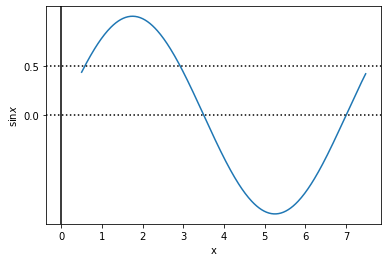

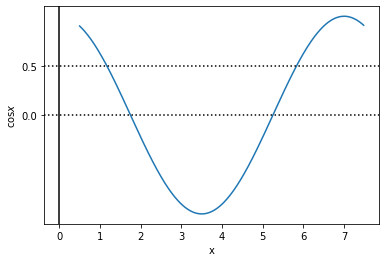

In [50]:
x = np.arange(0.5, 7.5, 0.02)
plt.plot(x, np.sin((2 * np.pi * x) / max(1, 2, 3, 4, 5, 6, 7)))

plt.axvline(0.0, color='k')
plt.axhline(y=0.0, ls='dotted', color='k')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5])
plt.ylim(-1.1, 1.1)
plt.xlabel('x')
plt.ylabel('$\sin x$')
plt.show()

x = np.arange(0.5, 7.5, 0.02)
plt.plot(x, np.cos((2 * np.pi * x) / max(1, 2, 3, 4, 5, 6, 7)))

plt.axvline(0.0, color='k')
plt.axhline(y=0.0, ls='dotted', color='k')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5])
plt.ylim(-1.1, 1.1)
plt.xlabel('x')
plt.ylabel('$\cos x$')
plt.show()

### 代码示例

代码参考如下，我们将 `day` 和 `month` 两列应用上述编码方法。

In [51]:
X_train_cyclic = X.copy()

columns=['day','month']

for col in columns:
    X_train_cyclic[col+'_sin'] = np.sin((2*np.pi*X_train_cyclic[col]) / max(X_train_cyclic[col]))
    X_train_cyclic[col+'_cos'] = np.cos((2*np.pi*X_train_cyclic[col]) / max(X_train_cyclic[col]))
    
X_train_cyclic = X_train_cyclic.drop(columns,axis=1)
X_train_cyclic[['day_sin', 'day_cos', 'month_sin', 'month_cos']].head()

,day_sin,day_cos,month_sin,month_cos
0,9.749279e-01,-0.222521,0.866025,0.500000
1,-2.449294e-16,1.000000,-0.866025,-0.500000
2,-2.449294e-16,1.000000,0.866025,0.500000
3,9.749279e-01,-0.222521,0.500000,0.866025
4,-2.449294e-16,1.000000,-0.866025,-0.500000


## Target Encoding

有时候，可能会采用一个数字来替换特征。

如果这个特征是分类特征，就用这个特征的出现频率来代替；如果这个特征是数字型特征，就用平均值来代替这个数字。

不过这种方法**缺点**比较明显，因为这样的编码很依赖目标的分布，通常不如 One Hot 方法。

例如：

Country | Target
-|-
India	|1
China	|0
India	|0
China	|1
India	|1

则这里对 India 的编码数字为：India对应为True的数目 / India特征的总数

所以有

Country | Target
-|-
India	|0.666
China	|0.500

这里我们以数据中的日期列为例子：

In [60]:
X_target = df_train[['id', 'day', 'month', 'target']].copy()
X_target.head(10)

,id,day,month,target
0,0,2,2,0
1,1,7,8,0
2,2,7,2,0
3,3,2,1,1
4,4,7,8,0
5,5,2,2,0
6,6,5,4,0
7,7,4,2,0
8,8,3,4,0
9,9,3,2,0


In [69]:
X_target['day'] = X_target['day'].astype('object')
X_target['month'] = X_target['month'].astype('object')

for col in X_target[['day', 'month']]:
    if (X_target[col].dtype == 'object'):
        target = X_target.groupby(col)['target'].agg('sum') / X_target.groupby(col)['target'].agg('count')
        X_target[col]=X_target[col].replace(target).values
        
    
    
X_target.head(10)

,id,day,month,target
0,0,0.322048,0.244432,0
1,1,0.340292,0.327496,0
2,2,0.340292,0.244432,0
3,3,0.322048,0.255729,1
4,4,0.340292,0.327496,0
5,5,0.322048,0.244432,0
6,6,0.273121,0.297352,0
7,7,0.252139,0.244432,0
8,8,0.281251,0.297352,0
9,9,0.281251,0.244432,0


In [70]:
X_target.groupby(col)['target'].agg('sum')

month
0.244432    11074
0.255729    10446
0.280936    11481
0.297352     7410
0.317053     3486
0.327496     6134
0.344642     6847
0.345295     8583
0.353157     7809
0.353634     8913
0.364099     9369
0.376554      212
Name: target, dtype: int64

> 由于 **Target Encoding** 方法很容易导致 Encoding 上的过拟合，所以通常采用 K-Fold Target Encoding 编码来减少过拟合。通过计算每一个折编码的均值来调整最终的编码。

## 总结

在对特征的编码过程中有很多种方法，常常需要判断哪种或者哪些方法才是最合适的。有时候甚至需要对多种编码方法进行组合运用。

这也是**特征工程（Feature Engineering）**的部分知识应用。

对特征工程的进一步学习可以参考[《精通特征工程》](https://item.jd.com/12515465.html?dist=jd)。